In [4]:
import pandas
import pycaret
import numpy as np
import math
import smogn
import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE
#from sklearn.preprocessing import MinMaxScaler
#import smogn

from pycaret.regression import load_model

In [549]:
filename = "Data_2021_08_13_v1_m.csv"

In [547]:
csv = pandas.read_csv(filename)
csv = csv.dropna(axis=0).reset_index(drop=True)#drop NaN
csv = csv[csv['Lmt']>0.1].reset_index(drop=True)
csv = csv[csv['Lmr']>0.1].reset_index(drop=True)
csv = csv[csv['k']>0].reset_index(drop=True)

for i in range(0, array_len): 

    csv['I1'][i] = csv['I1'][i].replace('i', 'j')
    csv['I2'][i] = csv['I2'][i].replace('i', 'j')
    csv['I1'][i] = csv['I1'][i].replace(' ', '')
    csv['I2'][i] = csv['I2'][i].replace(' ', '')
    csv['I1'][i] = complex(csv['I1'][i]).real
    csv['I2'][i] = complex(csv['I2'][i]).real

    if csv['Lt'][i] > 100 and csv['Lt'][i]/csv['Lmt'][i] > 0.5:
        csv['Lt'][i] = csv['Lt'][i] * 1e-3
    if csv['Lr'][i] > 100 and csv['Lr'][i]/csv['Lmr'][i] > 0.5:
        csv['Lr'][i] = csv['Lr'][i] * 1e-3
    if csv['Lm'][i] > 100 and csv['Lmt'][i] > 50:
        csv['Lm'][i] = csv['Lm'][i] * 1e-3
    if csv['Lm'][i] > 100:
        csv['Lm'][i] = csv['Lm'][i] * 1e-3

csv['I1'] = pandas.to_numeric(csv['I1'], downcast="float")
csv['I2'] = pandas.to_numeric(csv['I2'], downcast="float")


data = csv.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = csv.drop(data.index).reset_index(drop=True)


print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

data_unseen.to_csv("./test_data.csv")

Data for Modeling: (44104, 37)
Unseen Data For Predictions: (4900, 37)


In [548]:
#csv.to_csv("./Data_2021_08_13_v1_m.csv")

Unnamed: 0        N1        N2        d1        d2     freq   move_tx  \
0               0 -0.390156  1.091719  0.077552 -0.545684  40000.0 -0.715041   
1               1 -0.390156  1.091719  0.565992 -0.311685  40000.0  1.030225   
2               2 -0.390156  1.091719 -1.201698  1.115709  40000.0 -1.551614   
3               3 -0.390156  1.091719 -0.480666  0.928510  40000.0  0.958107   
4               4 -1.390427 -0.913307 -1.224957  1.139109  40000.0 -1.335259   
...           ...       ...       ...       ...       ...      ...       ...   
47926       48999  1.610385 -0.412051 -0.410889  0.226513  40000.0 -1.219870   
47927       49000 -1.390427 -0.913307 -1.341253  1.349708  40000.0 -1.306412   
47928       49001 -1.390427 -0.913307  0.961397 -1.200881  40000.0 -0.267907   
47929       49002 -1.390427 -0.913307  0.263624 -0.873283  40000.0 -0.152517   
47930       49003 -1.390427 -0.913307  0.310142 -0.569084  40000.0  1.333122   

        move_rx  offset_tx  offset_rx  ...        I2  N1s  N2s  offset  \
0      0.052351  -0.342874  -0.033944  ...  0.441787  100  256     3.0   
1      0.282697   0.338868   0.337075  ...  0.165429  100  256     0.0   
2      0.023558   1.440143   0.231070  ...  0.162938  100  256    11.5   
3      0.498647  -0.395315  -0.775982  ...  0.089700  100  256     3.5   
4      1.333650   0.443752   0.708094  ...  0.334730   36   64     2.5   
...         ...        ...        ...  ...       ...  ...  ...     ...   
47926  0.441060   0.181543  -0.722980  ...  0.701000  324  100     8.5   
47927  1.895118  -0.342874   0.019059  ...  0.380473   36   64     3.5   
47928 -0.451530  -0.919732  -0.457966  ...  0.454119   36   64     4.5   
47929 -0.955412  -2.597866  -2.737084  ...  0.214170   36   64     1.0   
47930  0.916149  -0.185549  -0.086947  ...  0.140575   36   64     1.0   

       sqrtN1N22  space2_ex  space4_ex  length1  length2  corearea  
0        25600.0     377.19    400.768   693.80  1177.80     545.4  
1        25600.0    1518.76    785.664  1381.20  2036.80    3199.2  
2        25600.0    1191.52    380.998  1016.30  1595.80    1733.6  
3        25600.0    1863.69   1149.696  1212.00  2252.40    2649.6  
4         2304.0     643.44    304.792   395.82   762.12     694.4  
...          ...        ...        ...      ...      ...       ...  
47926    32400.0     925.04    452.340  2009.70  2801.52    1562.4  
47927     2304.0     628.12    430.172   424.38   855.30     705.2  
47928     2304.0    1468.35    406.640   653.70  1035.54    1495.0  
47929     2304.0    2124.28    319.390   725.46  1165.20    1748.0  
47930     2304.0    1218.84    289.602   719.22   993.00    1562.4  

[47931 rows x 33 columns]

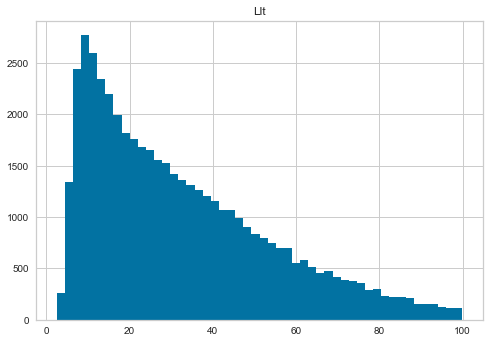

In [550]:
csv = pandas.read_csv(filename)
csv = csv.dropna(axis=0).reset_index(drop=True)#drop NaN
csv = csv[csv['Lmt']>0.1].reset_index(drop=True)
csv = csv[csv['Lmr']>0.1].reset_index(drop=True)
csv = csv[csv['k']>0].reset_index(drop=True)


#N1s = np.zeros(len(csv))
#N2s = np.zeros(len(csv))
#offset = np.zeros(len(csv))

"""

array_len = len(csv)

for i in range(0, array_len): 

    csv['I1'][i] = csv['I1'][i].replace('i', 'j')
    csv['I2'][i] = csv['I2'][i].replace('i', 'j')
    csv['I1'][i] = csv['I1'][i].replace(' ', '')
    csv['I2'][i] = csv['I2'][i].replace(' ', '')
    csv['I1'][i] = complex(csv['I1'][i]).real
    csv['I2'][i] = complex(csv['I2'][i]).real

    if csv['Lt'][i] > 100 and csv['Lt'][i]/csv['Lmt'][i] > 0.5:
        csv['Lt'][i] = csv['Lt'][i] * 1e-3
    if csv['Lr'][i] > 100 and csv['Lr'][i]/csv['Lmr'][i] > 0.5:
        csv['Lr'][i] = csv['Lr'][i] * 1e-3
    if csv['Lm'][i] > 100 and csv['Lmt'][i] > 50:
        csv['Lm'][i] = csv['Lm'][i] * 1e-3
    if csv['Lm'][i] > 100:
        csv['Lm'][i] = csv['Lm'][i] * 1e-3

csv['I1'] = pandas.to_numeric(csv['I1'], downcast="float")
csv['I2'] = pandas.to_numeric(csv['I2'], downcast="float")

"""

# extra parameter
N1s = csv["N1"].to_numpy() **2
N2s = csv["N2"].to_numpy() **2
offset = abs(csv["offset_tx"]-csv["offset_rx"])
#N1N2 = N1s*N2s
#sqrtN1N2 = np.sqrt(N1s*N2s)
sqrtN1N22 = np.sqrt(N1s*N2s)**2
#space1_ex = csv["space1"].to_numpy() * csv["w1"].to_numpy()
#space3_ex = csv["space3"].to_numpy() * csv["l1"].to_numpy() * 2
space2_ex = csv["space2"].to_numpy() * csv["w1"].to_numpy()
space4_ex = csv["space4"].to_numpy() * csv["l1"].to_numpy() * 2
#space2_ex2 = csv["space2"].to_numpy() * csv["w1"].to_numpy() * csv["N1"].to_numpy() **2 * csv["N2"].to_numpy() **2  
#space4_ex2 = csv["space4"].to_numpy() * csv["l1"].to_numpy() * 2 * csv["N1"].to_numpy() **2 * csv["N2"].to_numpy() **2  
length1 = csv["N1"].to_numpy() * (csv["l1"]*2 + csv["space1"]*2 + csv["w1"] + csv["space3"]*2)/2 + csv["N1"].to_numpy() * (csv["l1"]*2 + csv["space1"]*2 + csv["space5"] *2 + csv["w1"] + csv["space3"]*2)/2
length2 = csv["N1"].to_numpy() * (csv["l1"]*2 + csv["space2"]*2 + csv["w1"] + csv["space4"]*2)/2 + csv["N1"].to_numpy() * (csv["l1"]*2 + csv["space2"]*2 + csv["space6"] *2 + csv["w1"] + csv["space4"]*2)/2
#window1 = (csv["l1"].to_numpy() * 2 + csv["space1"].to_numpy() *2) * (csv["w1"].to_numpy() + csv["space3"].to_numpy() *2)
#window2 = (csv["l1"].to_numpy() * 2 + csv["space2"].to_numpy() *2) * (csv["w1"].to_numpy() + csv["space4"].to_numpy() *2)
#from_l2 = (csv["l2"]).to_numpy() - (csv["space2"]).to_numpy() - (csv["space5"]).to_numpy()
#corevolume = (4*csv["l1"].to_numpy() + 2*csv["l2"].to_numpy()) * csv["h1"].to_numpy() * csv["w1"].to_numpy() - 2 * csv["l2"].to_numpy() * csv["h1"].to_numpy() * csv["w1"].to_numpy()
corearea  = 2*csv["l1"].to_numpy() * csv["w1"].to_numpy()

#csv['sqrtN1N2'] = pandas.to_numeric(csv['sqrtN1N2'], downcast="float")



N1s = pandas.DataFrame(N1s,columns=["N1s"])
N2s = pandas.DataFrame(N2s,columns=["N2s"])
offset = pandas.DataFrame(offset,columns=["offset"])
#N1N2 = pandas.DataFrame(N1N2,columns=["N1N2"])
#sqrtN1N2 = pandas.DataFrame(sqrtN1N2,columns=["sqrtN1N2"])
sqrtN1N22 = pandas.DataFrame(sqrtN1N22,columns=["sqrtN1N22"])
#space1_ex = pandas.DataFrame(space1_ex,columns=["space1_ex"])
#space3_ex = pandas.DataFrame(space3_ex,columns=["space3_ex"])
space2_ex = pandas.DataFrame(space2_ex,columns=["space2_ex"])
space4_ex = pandas.DataFrame(space4_ex,columns=["space4_ex"])
#space2_ex2 = pandas.DataFrame(space2_ex2,columns=["space2_ex2"])
#space4_ex2 = pandas.DataFrame(space4_ex2,columns=["space4_ex2"])
length1 = pandas.DataFrame(length1,columns=["length1"])
length2 = pandas.DataFrame(length2,columns=["length2"])
#window1 = pandas.DataFrame(window1,columns=["window1"])
#window2 = pandas.DataFrame(window2,columns=["window2"])
#from_l2 = pandas.DataFrame(from_l2,columns=["from_l2"])
#corevolume = pandas.DataFrame(corevolume,columns=["corevolume"])
#corearea = pandas.DataFrame(corearea ,columns=["corearea"])
 
csv = pandas.concat([csv,N1s,N2s,offset,sqrtN1N22,space2_ex,space4_ex,length1,length2],axis=1)




R1 = np.zeros(array_len)
R2 = np.zeros(array_len)

for i in range(0, array_len): 
    R1[i] = csv['copperloss_tx'][i]/csv['I1'][i]/csv['I1'][i]
    R2[i] = csv['copperloss_rx'][i]/csv['I2'][i]/csv['I2'][i]

csv = csv.assign(R1 = R1)
csv = csv.assign(R2 = R2)





# N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,space5,space6,l1,l2,h1,w1,Lmt,Lmr,Llt,Llr,k,Lt,Lr,Lm,Rt,Rr,I1,I2,Zt,Zr,Zm,copperloss_tx,copperloss_rx




#csv = csv[csv['copperloss_tx'] < 1000]
#csv = csv[csv['copperloss_rx'] < 1000]

#csv = csv[csv['Lmt'] < 30]
#csv = csv[csv['Lmt'] > 3]
#csv = csv[csv['Lmr'] < 10]
#csv = csv[csv['Lmr'] > 3]
csv = csv[csv['Llt'] < 100]
csv = csv[csv['Llr'] > 3]

#csv = csv[csv['Lr'] < 20]

# normalize data

csv["N1"] = (csv["N1"] - csv.describe().iloc[1,:][1])/csv.describe().iloc[2,:][1]
csv["N2"] = (csv["N2"] - csv.describe().iloc[1,:][2])/csv.describe().iloc[2,:][2]
csv["d1"] = (csv["d1"] - csv.describe().iloc[1,:][3])/csv.describe().iloc[2,:][3]
csv["d2"] = (csv["d2"] - csv.describe().iloc[1,:][4])/csv.describe().iloc[2,:][4]
#csv["freq"] = (csv["freq"] - csv.describe().iloc[1,:][5])/csv.describe().iloc[2,:][5]
csv["move_tx"] = (csv["move_tx"] - csv.describe().iloc[1,:][6])/csv.describe().iloc[2,:][6]
csv["move_rx"] = (csv["move_rx"] - csv.describe().iloc[1,:][7])/csv.describe().iloc[2,:][7]
csv["offset_tx"] = (csv["offset_tx"] - csv.describe().iloc[1,:][8])/csv.describe().iloc[2,:][8]
csv["offset_rx"] = (csv["offset_rx"] - csv.describe().iloc[1,:][9])/csv.describe().iloc[2,:][9]
csv["per"] = (csv["per"] - csv.describe().iloc[1,:][10])/csv.describe().iloc[2,:][10]
csv["space1"] = (csv["space1"] - csv.describe().iloc[1,:][11])/csv.describe().iloc[2,:][11]
csv["space2"] = (csv["space2"] - csv.describe().iloc[1,:][12])/csv.describe().iloc[2,:][12]
csv["space3"] = (csv["space3"] - csv.describe().iloc[1,:][13])/csv.describe().iloc[2,:][13]
csv["space4"] = (csv["space4"] - csv.describe().iloc[1,:][14])/csv.describe().iloc[2,:][14]
csv["space5"] = (csv["space5"] - csv.describe().iloc[1,:][15])/csv.describe().iloc[2,:][15]
csv["space6"] = (csv["space6"] - csv.describe().iloc[1,:][16])/csv.describe().iloc[2,:][16]
csv["l1"] = (csv["l1"] - csv.describe().iloc[1,:][17])/csv.describe().iloc[2,:][17]
csv["l2"] = (csv["l2"] - csv.describe().iloc[1,:][18])/csv.describe().iloc[2,:][18]
csv["h1"] = (csv["h1"] - csv.describe().iloc[1,:][19])/csv.describe().iloc[2,:][19]
csv["w1"] = (csv["w1"] - csv.describe().iloc[1,:][20])/csv.describe().iloc[2,:][20]

"""
csv["N1s"] = (csv["N1s"] - csv.describe().iloc[3,:][24])/(csv.describe().iloc[7,:][24]-csv.describe().iloc[3,:][24])
csv["N2s"] = (csv["N2s"] - csv.describe().iloc[3,:][25])/(csv.describe().iloc[7,:][25]-csv.describe().iloc[3,:][25])
csv["offset"] = (csv["offset"] - csv.describe().iloc[1,:][26])/csv.describe().iloc[2,:][26]
#csv["sqrtN1N22"] = (csv["sqrtN1N22"] - csv.describe().iloc[1,:][27])/csv.describe().iloc[2,:][27]
csv["space2_ex"] = (csv["space2_ex"] - csv.describe().iloc[1,:][28])/csv.describe().iloc[2,:][28]
csv["space4_ex"] = (csv["space4_ex"] - csv.describe().iloc[1,:][29])/csv.describe().iloc[2,:][29]
"""

#csv = csv[csv['R2'] < 0.15]
#csv = csv[csv['R2'] > 0.03]
#csv = csv[csv['R2'] < 0.15]

csv = csv.drop('Rt',axis=1)
csv = csv.drop('Rr',axis=1)
csv = csv.drop('Zt',axis=1)
csv = csv.drop('Zr',axis=1)
csv = csv.drop('Zm',axis=1)
csv = csv.drop('Lmt',axis=1)
csv = csv.drop('Lmr',axis=1)
#csv = csv.drop('Llt',axis=1)
csv = csv.drop('Llr',axis=1)
csv = csv.drop('k',axis=1)
csv = csv.drop('Lt',axis=1)
csv = csv.drop('Lr',axis=1)
csv = csv.drop('Lm',axis=1)
csv = csv.drop('copperloss_tx',axis=1)
csv = csv.drop('copperloss_rx',axis=1)
csv = csv.drop('R1',axis=1)
csv = csv.drop('R2',axis=1)

dataset = csv
dataset = dataset.dropna(axis=0).reset_index(drop=True)



dataset.hist('Llt',bins=50)
#dataset.hist('I2',bins=50)

dataset.describe()
dataset



array([[<AxesSubplot:title={'center':'N1s'}>]], dtype=object)

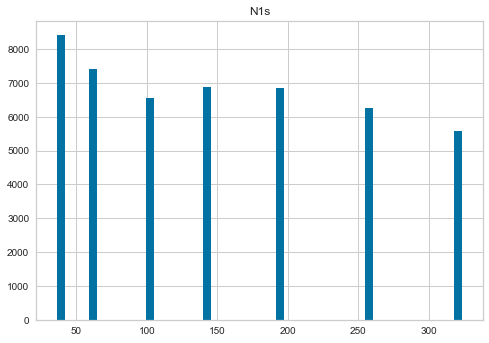

In [551]:
dataset.hist('N1s',bins=50)

In [552]:
csv.describe().iloc[3,:][3]

-1.759916148519497

In [553]:
csv["N1s"].describe()

count    47931.000000
mean       149.629259
std         95.185243
min         36.000000
25%         64.000000
50%        144.000000
75%        196.000000
max        324.000000
Name: N1s, dtype: float64

In [554]:
csv.describe().iloc[3,:][24]

36.0

In [555]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)


print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

#data.to_csv("./train_data.csv")

Data for Modeling: (43138, 33)
Unseen Data For Predictions: (4793, 33)


In [556]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Llt', session_id=123, silent=True, use_gpu=True) 

In [557]:
# top3 = [ create_model(name) for name in ["xgboost","lightgbm", "rf"] ]
#top3 = compare_models(n_select = 3) 
#best5 = create_model('lightgbm',num_leaves=60, max_depth=20, min_data_in_leaf=20) # default num_leave : 31 / max_depth = -1 / min_data_in_leaf = 20
#best5 = create_model('mlp')
#best5 = create_model('gbr')
lgbm = create_model('lightgbm',num_leaves=60, max_depth=20, min_data_in_leaf=20) # default num_leave : 31 / max_depth = -1 / min_data_in_leaf = 20
#et = create_model('et')
#rf = create_model('rf')
#top3 = [lgbm, et, rf]

In [558]:
#tuned_top3 = [tune_model(i) for i in top3]

In [559]:
#bagged_top3 = [ensemble_model(i) for i in top3]


In [560]:
#tuned_model = tune_model(best5, optimize = 'MSE')

In [561]:
#blender = blend_models(estimator_list = top3)

In [562]:
#stacked = stack_models(estimator_list=top3)

In [563]:
#automl = automl(optimize = 'RMSE')

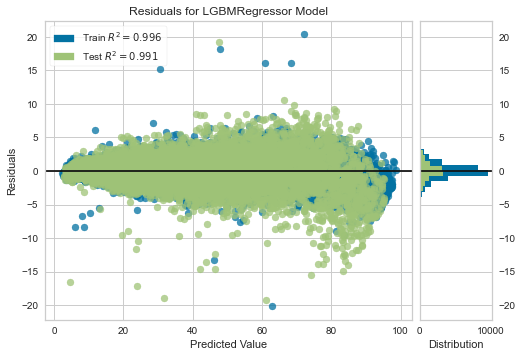

In [564]:
plot_model(estimator = lgbm, plot='residuals')
#plot_model(tuned_model)

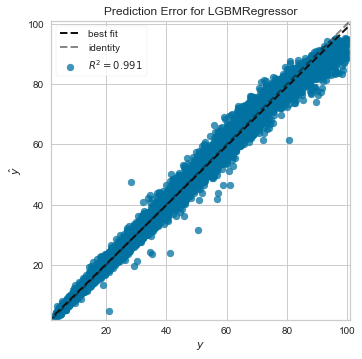

In [565]:
plot_model(estimator = lgbm, plot='error')

In [566]:
evaluate_model(automl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [567]:
lgbm

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              device='gpu', importance_type='split', learning_rate=0.1,
              max_depth=20, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=20, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=60, objective=None, random_state=123,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [568]:
#plot_model(estimator = best5, plot='rfe')

In [569]:
plot_model(estimator = best5, plot = 'feature_all')

IntProgress(value=0, description='Processing: ', max=5)

Finished loading model, total used 100 iterations


ValueError: All arrays must be of the same length

In [ ]:
evaluate_model(best5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#save_model(best5, "ML_model2_v3_2021_08_13_v1_Lr")